In [1]:
# Basic Setup
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import collections
import matplotlib.pyplot as plt

In [2]:
# Read Data
training_data = pd.read_csv('adult.data', sep=',', header=None)
attributes_names = ['Age', 'Workclass','Fnlwgt','Education','Education_Num','Marital_Status',
                    'Occupation','Relationship','Race','Sex','Capital_Gain','Capital_Loss',
                    'Hours_Per_Week','Native_Country','Income']
training_data.columns = attributes_names
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_Per_Week  32561 non-null  int64 
 13  Native_Country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
object_columns = ['Workclass', 'Education', 'Marital_Status', 'Occupation',
                          'Relationship', 'Race', 'Sex', 'Native_Country', 'Income']
numerical_training_data = training_data.copy()
for str_col in object_columns:
    # remove unknown value ('?')
    training_data = training_data[training_data[str_col] != ' ?']
    numerical_training_data = numerical_training_data[numerical_training_data[str_col] != ' ?']
    # assign numerical value for categorical value
    numerical_training_data[str_col] = numerical_training_data[str_col].astype('category').cat.codes

print('Number of data in dataset after removing unkown value:\t', len(numerical_training_data))

# record numerical value for categorical value in each object attribute
corresponding_attributes = {}
for j in (1, 3, 5, 6, 7, 8, 9, 13):
    dic, numerical_list = {}, list(numerical_training_data[attributes_names[j]])
    for i, temp_str in enumerate(list(training_data[attributes_names[j]])):
        if temp_str.strip() not in dic:
            dic[temp_str.strip()] = numerical_list[i]
    corresponding_attributes[j] = dic
# print(corresponding_attributes)

Number of data in dataset after removing unkown value:	 30162


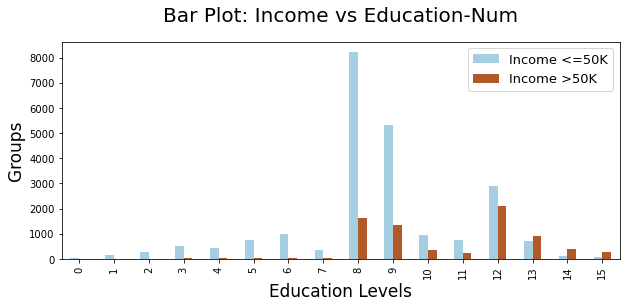

In [4]:
# Plot Group 1 - Income vs Education Level

# Box Plot
# get the education levels and count how many groups are in each level
less = numerical_training_data[numerical_training_data['Income'] == 0]
more = numerical_training_data[numerical_training_data['Income'] == 1]
less_than_50k = less['Education_Num'].value_counts().to_dict()
more_than_50k = more['Education_Num'].value_counts().to_dict()
# print(less)
# print(more_than_50k)

# fill the Count Dataframe if there exists key(s) that has(have) 0 value
for i in range(1, 17):
    if i not in less_than_50k:
        less_than_50k[i] = 0
for i in range(1, 17):
    if i not in more_than_50k:
        more_than_50k[i] = 0

# print(sorted(less_than_50k.items(), key = lambda x: x[0]))
# print(more_than_50k)   

# extract the values of groups
less_than_50k = sorted(less_than_50k.items(), key=lambda x: x[0])
more_than_50k = sorted(more_than_50k.items(), key=lambda x: x[0])
less_than_50k_values = [value for key, value in less_than_50k]
more_than_50k_values = [value for key, value in more_than_50k]

# plot the graph
df = pd.DataFrame({'Income <=50K': less_than_50k_values, 'Income >50K': more_than_50k_values})
df.plot(kind="bar", colormap='Paired', figsize=(10,4))

plt.title("Bar Plot: Income vs Education-Num", fontsize=20, pad=20)
plt.legend(loc=1, prop={'size': 13})
plt.xlabel("Education Levels", fontsize=17)
plt.ylabel("Groups", fontsize=17)
plt.show()

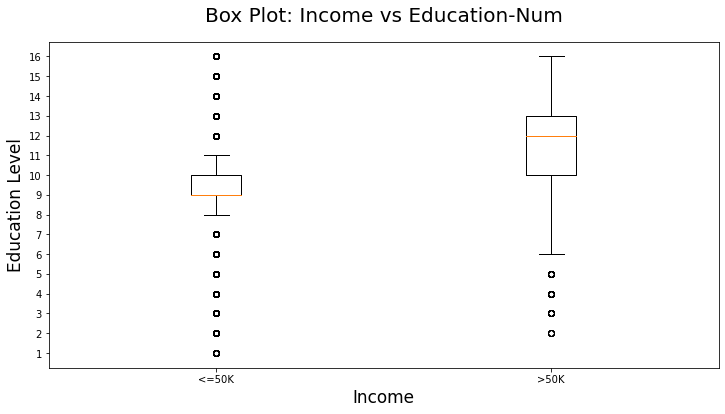

In [5]:
# Box-Whisker Plot

df_less_than_50k = numerical_training_data[numerical_training_data['Income'] == 0]
df_more_than_50k = numerical_training_data[numerical_training_data['Income'] == 1]

# plot and show the range of education levels of two different income groups
fig, ax = plt.subplots(figsize=(12,6))
dataset = [df_less_than_50k["Education_Num"], df_more_than_50k["Education_Num"]]
labels = ["<=50K",">50K"]
ax.boxplot(dataset, labels=labels)

plt.yticks(range(1,17,1))
plt.xlabel("Income", fontsize=17)
plt.ylabel("Education Level", fontsize=17)
plt.title("Box Plot: Income vs Education-Num", fontsize=20, pad=20)
plt.show()

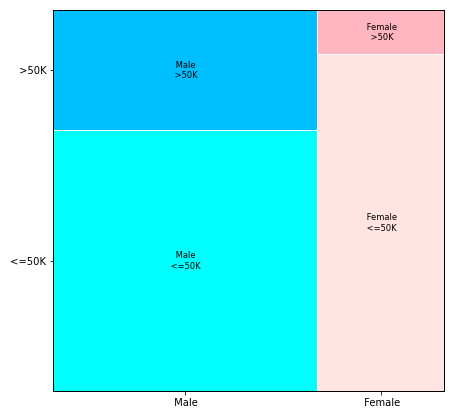

In [32]:
# Plot 2 - Income vs Sex (Mosaic Plot)
from statsmodels.graphics.mosaicplot import mosaic

cols = {(" Male", " <=50K"):'#00FFFF', (' Male',' >50K'):'#00BFFF',(' Female',' <=50K'):'#FFE4E1', (' Female',' >50K'):'#FFB6C1'}
mosaic(training_data, ["Sex","Income"], properties=lambda key:{'color':cols[key]})
plt.show()